In [14]:
# Nifty 50 1Y data downloaded from https://www.nseindia.com/reports-indices-historical-index-data
import pandas as pd
org_df = pd.read_csv('datasets/NIFTY 50-10-10-2023-to-10-10-2024.csv')
org_df.columns = org_df.columns.str.strip()       # remove space from column names
# df.set_index('Date', inplace=True)
org_df

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,10-OCT-2023,19565.60,19717.80,19565.45,19689.85,216559447.0,18735.62
1,11-OCT-2023,19767.00,19839.20,19756.95,19811.35,213729730.0,19900.99
2,12-OCT-2023,19822.70,19843.30,19772.65,19794.00,217904144.0,20999.94
3,13-OCT-2023,19654.55,19805.40,19635.30,19751.05,254955979.0,24363.02
4,16-OCT-2023,19737.25,19781.30,19691.85,19731.75,180964341.0,14746.01
...,...,...,...,...,...,...,...
244,03-OCT-2024,25452.85,25639.45,25230.30,25250.10,423395030.0,45689.50
245,04-OCT-2024,25181.90,25485.05,24966.80,25014.60,374914801.0,42719.71
246,07-OCT-2024,25084.10,25143.00,24694.35,24795.75,374345795.0,40550.24
247,08-OCT-2024,24832.20,25044.00,24756.80,25013.15,333220055.0,33493.36


<Axes: xlabel='Date'>

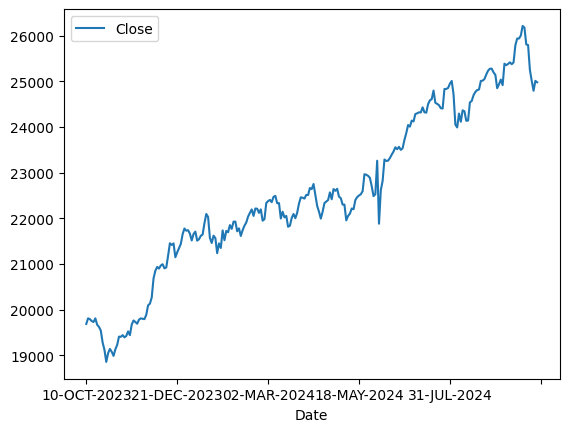

In [15]:
org_df.plot(x='Date', y='Close')

<Axes: xlabel='Date'>

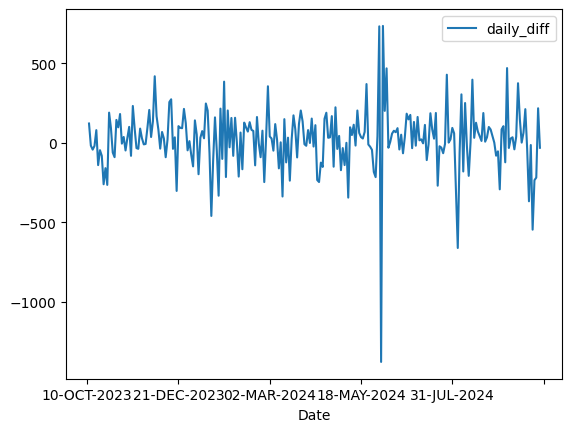

In [20]:
org_df['daily_diff'] = org_df['Close'] - org_df['Close'].shift(1)
org_df.plot(x='Date', y='daily_diff')

In [16]:
# Lagged Dataset: Sliding Window method (window width 3)
df = pd.DataFrame({
    't-3': org_df['Close'].shift(3),
    't-2': org_df['Close'].shift(2),
    't-1': org_df['Close'].shift(1),
    't': org_df['Close']
})
df

,t-3,t-2,t-1,t
0,NaN,NaN,NaN,19689.85
1,NaN,NaN,19689.85,19811.35
2,NaN,19689.85,19811.35,19794.00
3,19689.85,19811.35,19794.00,19751.05
4,19811.35,19794.00,19751.05,19731.75
...,...,...,...,...
244,26178.95,25810.85,25796.90,25250.10
245,25810.85,25796.90,25250.10,25014.60
246,25796.90,25250.10,25014.60,24795.75
247,25250.10,25014.60,24795.75,25013.15


<Axes: xlabel='t-1'>

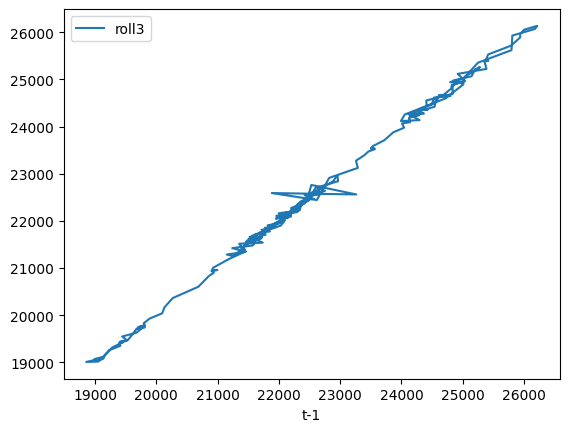

In [19]:
df['roll3'] = df['t'].rolling(window=3).mean()
df[1:].plot(x='t-1', y='roll3')

In [ ]:
df['']